In [35]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Input
from keras.optimizers.legacy import Adam
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

In [36]:
data = pd.read_csv("combined.csv")
data = data.drop("date.1", axis=1)
data = data.drop("date", axis=1)
data

,temperature,rain,wind_speed,wind_direction,humidity,pressure,total_cloud,visibility,solar_radiation
0,4.2,0.0,2.1,320.0,68.0,1021.5,0.0,20000.0,0.0
1,4.1,0.0,1.9,320.0,67.0,1021.4,0.0,20000.0,0.0
2,3.9,0.0,1.0,250.0,68.0,1021.7,0.0,20000.0,0.0
3,3.7,0.0,1.9,320.0,70.0,1021.6,0.0,20000.0,0.0
4,3.6,0.0,1.1,50.0,72.0,1020.7,0.0,17950.0,0.0
...,...,...,...,...,...,...,...,...,...
59562,18.7,0.0,1.8,180.0,72.0,15.5,2.0,4057.0,0.0
59563,16.4,0.0,0.7,200.0,84.0,15.6,3.0,3245.0,0.0
59564,14.4,0.0,0.5,70.0,88.0,14.4,6.0,2590.0,0.0
59565,13.0,0.0,0.1,0.0,92.0,13.7,5.0,1632.0,0.0


In [37]:
# data["date"] = pd.to_datetime(data["date"])
# data = data.set_index("date")
# data

In [38]:
datax1 = data[["total_cloud", "rain", "visibility", "humidity"]]
datax2 = data[["total_cloud", "rain", "visibility", "humidity", "wind_speed", "wind_direction", "pressure", "temperature"]]
datay = data["solar_radiation"]

In [39]:
# Train
time_steps = 48
features = 4

feature_array = datax1.to_numpy()
dv_array = datay.to_numpy()
feature_array.shape
dv_array.shape

(59567,)

In [40]:

# array = data["solar_radiation"].to_numpy()

num_sequence = len(feature_array) - time_steps

X1 = np.zeros((num_sequence, time_steps, features))
y1 = np.zeros(num_sequence)

for i in range(num_sequence):
    X1[i] = feature_array[i: i+time_steps]
    y1[i] = dv_array[i + time_steps]


In [41]:
train_size =round(len(X1) * 0.7)

trainX = X1[:train_size]
trainy = y1[:train_size]

testX = X1[train_size:]
testy = y1[train_size:]


In [42]:
optimizer = Adam(learning_rate=0.0001)

model1 = Sequential()

model1.add(Input((48,4)))
model1.add(LSTM(10, activation="relu"))
model1.add(Dense(1))

model1.compile(loss="mse", optimizer=optimizer)

model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 10)                600       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 611 (2.39 KB)
Trainable params: 611 (2.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/300
521/521 [==============================] - 3s 5ms/step - loss: 1.1599 - val_loss: 1.2556
Epoch 2/300
521/521 [==============================] - 3s 5ms/step - loss: 1.0693 - val_loss: 1.1933
Epoch 3/300
521/521 [==============================] - 3s 5ms/step - loss: 1.0135 - val_loss: 1.1437
Epoch 4/300
521/521 [==============================] - 3s 5ms/step - loss: 0.9699 - val_loss: 1.1012
Epoch 5/300
521/521 [==============================] - 3s 5ms/step - loss: 0.9340 - val_loss: 1.0641
Epoch 6/300
521/521 [==============================] - 3s 5ms/step - loss: 0.9037 - val_loss: 1.0321
Epoch 7/300
521/521 [==============================] - 3s 5ms/step - loss: 0.8785 - val_loss: 1.0046
Epoch 8/300
521/521 [==============================] - 3s 5ms/step - loss: 0.8577 - val_loss: 0.9812
Epoch 9/300
521/521 [==============================] - 2s 5ms/step - loss: 0.8409 - val_loss: 0.9617
Epoch 10/300
521/521 [==============================] - 2s 5ms/step - loss: 0.8276 - val_lo

<Axes: >

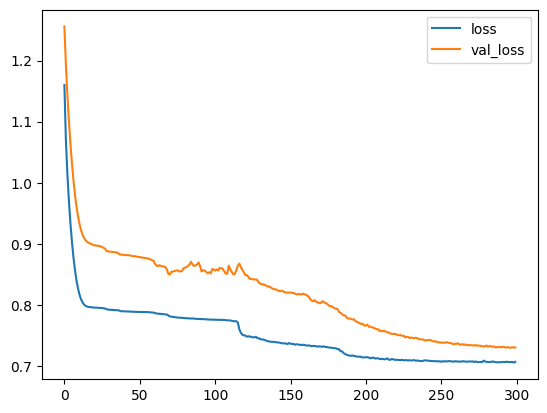

In [43]:
trained = model1.fit(trainX, trainy, validation_split=0.2, batch_size=64, epochs=300)
pd.DataFrame.from_dict(trained.history).plot()

In [44]:
loss = model1.evaluate(testX, testy)
print(f"Test loss: {loss}")

558/558 [==============================] - 1s 1ms/step - loss: 0.8535
Test loss: 0.8535326719284058


In [45]:
predicted1 = model1.predict(testX)
predicted1

558/558 [==============================] - 1s 1ms/step


array([[0.35133088],
       [0.35041022],
       [0.36254978],
       ...,
       [0.3772545 ],
       [0.49734813],
       [0.35599113]], dtype=float32)

In [46]:
predicted1 = np.maximum(0, predicted1)
predicted1

array([[0.35133088],
       [0.35041022],
       [0.36254978],
       ...,
       [0.3772545 ],
       [0.49734813],
       [0.35599113]], dtype=float32)

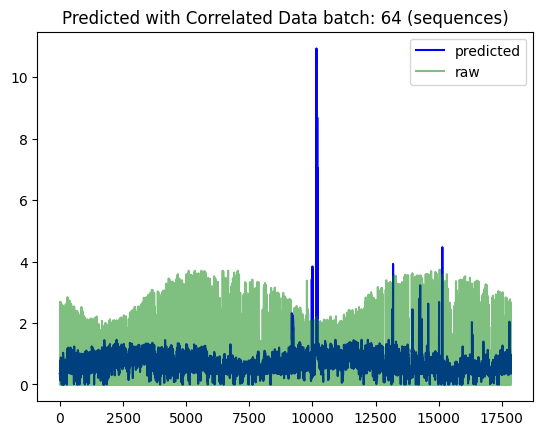

In [47]:
import matplotlib.pyplot as plt

plt.title("Predicted with Correlated Data batch: 64 (sequences)")
plt.plot(  predicted1, c="b", label="predicted")
plt.plot( testy,c="g", alpha=.5, label="raw")
plt.legend(loc="best")
plt.savefig("corr_predict_sequence_relu_64_300_model")

In [48]:
from sklearn.metrics import mean_squared_error


In [49]:
predicted1.shape

(17856, 1)

In [50]:
error = mean_squared_error(testy, predicted1)

print("MSE: {}, RMSE: {}".format(error, np.sqrt(error)))

MSE: 0.8533100396146008, RMSE: 0.9237478225222514


In [51]:
feature_array2 = datax2.to_numpy()
dv_array2 = datay.to_numpy()


In [52]:
time_steps = 48
features2 = 8


num_sequence2 = len(feature_array2) - time_steps

X2 = np.zeros((num_sequence2, time_steps, features2))
y2 = np.zeros(num_sequence2)

for i in range(num_sequence2):
    X2[i] = feature_array2[i: i+time_steps]
    y2[i] = dv_array2[i + time_steps]

In [53]:
train_size =round(len(X2) * 0.7)

trainX2 = X2[:train_size]
trainy2 = y2[:train_size]

testX2 = X2[train_size:]

testy2 = y2[train_size:]

In [54]:
optimizer = Adam(learning_rate=0.0001)

model2 = Sequential()

model2.add(Input((48,8)))
model2.add(LSTM(10, activation="relu"))
model2.add(Dense(1))

model2.compile(loss="mse", optimizer=optimizer)

model2.summary()



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 10)                760       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 771 (3.01 KB)
Trainable params: 771 (3.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/300
521/521 [==============================] - 4s 6ms/step - loss: 658744.2500 - val_loss: 3082366.2500
Epoch 2/300
521/521 [==============================] - 3s 5ms/step - loss: 425564.1250 - val_loss: 1534751.2500
Epoch 3/300
521/521 [==============================] - 3s 5ms/step - loss: 221787.7031 - val_loss: 977671.6250
Epoch 4/300
521/521 [==============================] - 3s 5ms/step - loss: 164494.4844 - val_loss: 782798.0625
Epoch 5/300
521/521 [==============================] - 3s 5ms/step - loss: 129075.0469 - val_loss: 465402.1875
Epoch 6/300
521/521 [==============================] - 3s 5ms/step - loss: 86985.9766 - val_loss: 257020.4531
Epoch 7/300
521/521 [==============================] - 3s 5ms/step - loss: 42796.3867 - val_loss: 112941.8047
Epoch 8/300
521/521 [==============================] - 3s 5ms/step - loss: 11475.8447 - val_loss: 41290.5000
Epoch 9/300
521/521 [==============================] - 3s 5ms/step - loss: 2345.1562 - val_loss: 650.0756
Epoch 10

<Axes: >

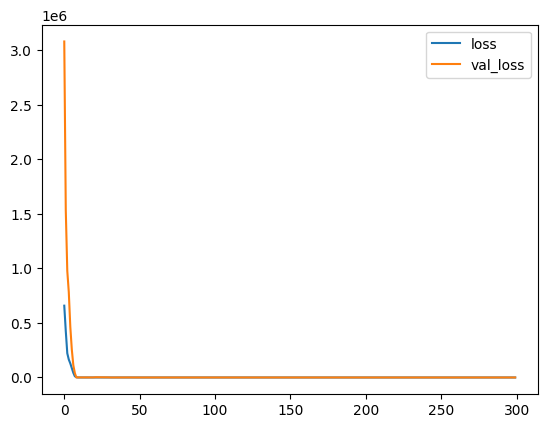

In [55]:
trained2 = model2.fit(trainX2, trainy2, validation_split=0.2, batch_size=64, epochs=300)
pd.DataFrame.from_dict(trained2.history).plot()

In [56]:
loss2 = model2.evaluate(testX2, testy2)
print(f"Test loss: {loss2}")

558/558 [==============================] - 1s 1ms/step - loss: 4.1372
Test loss: 4.137171268463135


In [57]:
result2 = model2.predict(testX2)
result2

558/558 [==============================] - 1s 1ms/step


array([[0.48529112],
       [0.48529112],
       [0.48529112],
       ...,
       [1.7723299 ],
       [0.4852918 ],
       [0.48529112]], dtype=float32)

In [58]:
result2 = np.maximum(0, result2)
result2

array([[0.48529112],
       [0.48529112],
       [0.48529112],
       ...,
       [1.7723299 ],
       [0.4852918 ],
       [0.48529112]], dtype=float32)

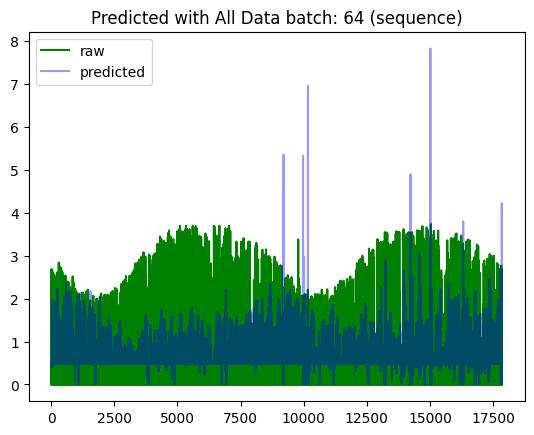

In [59]:
plt.title("Predicted with All Data batch: 64 (sequence)")
plt.plot(testy2, c="g", label="raw")
plt.plot(result2, c="b", alpha=.4, label="predicted")
plt.legend(loc="best")
plt.savefig("all_predict_sequence_relu_64_300")

In [60]:
error2 = mean_squared_error(testy2, result2)
print("MSE: {}, RMSE: {}".format(error2, np.sqrt(error2)))

MSE: 0.7417425744696422, RMSE: 0.8612447819694713


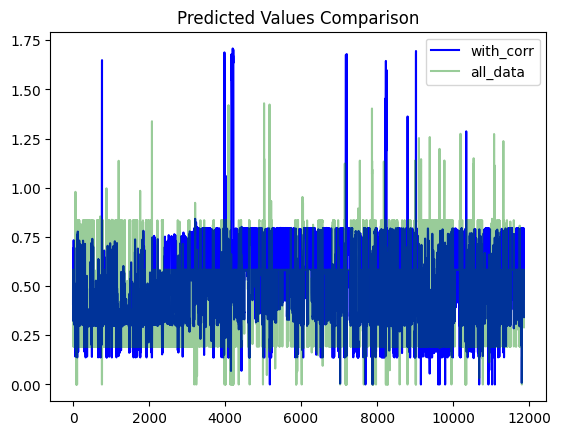

In [157]:
import matplotlib.pyplot as plt

plt.title("Predicted Values Comparison")
plt.plot( predicted1, c="b", label="with_corr")
plt.plot(result2,c="g", label="all_data", alpha=.4)
plt.xticks()
plt.legend(loc="best")
plt.savefig("predict_compare")